In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RandomWalk():
    def __init__(self, path:str):
        self.df = pd.read_csv(path)
        
    def show_df(self) -> None:
        display(self.df)
    
    def get_dimension(self) -> tuple:
        ''' get dimensions on dataframe'''
        rows = self.df.shape[0]
        cols = self.df.shape[1]
        return (rows, cols)
        
    def count_missing(self, column:str) -> int:
        ''' checks column has null or empty string ("") ''' 
        count = 0
        for x, y in zip(self.df[column].eq(''), self.df[column].isnull()):
            if x or y:
                count += 1
        return count
    
    def unique_books(self) -> int:
        ''' handle null values of "original_title" column '''
        self.df.loc[self.df['original_title'].eq(''), 'original_title'] = None
        # test.dropna(subset=['Salary'], inplace=True)
        self.df.fillna("Not Found", inplace=True)

        # find count of unique books based on book_id
        return len(self.df['book_id'].unique())
    
    def average(self, column:str) -> int:
        ''' returns the average of books '''
        return self.df[column].mean()
    
    def count_published(self, column:str, year:int) -> int:
        ''' get number of books published in a particular year '''  
        return self.df[column].value_counts().get(year)
    
    def max_ratings_book(self, column:str) -> str:
        ''' return title of book with maximum rating '''
        index = self.df[column].idxmax()
        return self.df.loc[index]['original_title']
    
    def plot_bar_chart(self, x_axis, y_axis):
        ''' plot bar charts '''
        plt.figure(figsize=(12,6))
        plt.bar(x_axis, y_axis, color='mediumslateblue', width=0.4)
        plt.xlabel("Bucket", size=12)
        plt.ylabel("Count of ratings", size=12)

        plt.grid(axis ='y',alpha=0.4)
        plt.tick_params(left = False, bottom=False)

        i = 0
        for spine in plt.gca().spines.values():
            if i%2:
                spine.set_visible(False)
            i += 1

        plt.title('Ratings based on bucket', size=14)
        plt.xticks(rotation=90)
        plt.show()
        
    def plot_rating_bucket(self, column:str) -> None:
        ''' create buckets and plot bar chart of bucket count \n 
            we can either use panda's cut method to create buckets, since we need to plot graph \n 
            based on that, we can use this method as well.
        '''
        bucket = {}
        for rating in self.df[column]:
            if rating >= 0 and rating < 0.5:
                bucket['0'] = bucket.get('0', 0) + 1
            elif rating >= 0.5 and rating < 1.0:
                bucket['0.5'] = bucket.get('0.5', 0) + 1
            elif rating >= 1.0 and rating < 1.5:
                bucket['1.0'] = bucket.get('1.0', 0) + 1
            elif rating >= 1.5 and rating < 2.0:
                bucket['1.5'] = bucket.get('1.5', 0) + 1
            elif rating >= 2.0 and rating < 2.5:
                bucket['2.0'] = bucket.get('2.0', 0) + 1
            elif rating >= 2.5 and rating < 3.0:
                bucket['2.5'] = bucket.get('2.5', 0) + 1
            elif rating >= 3.0 and rating < 3.5:
                bucket['3.0'] = bucket.get('3.0', 0) + 1
            elif rating >= 3.5 and rating < 4.0:
                bucket['3.5'] = bucket.get('3.5', 0) + 1
            elif rating >= 4.0 and rating < 4.5:
                bucket['4.0'] = bucket.get('4.0', 0) + 1
            else:
                bucket['5.0'] = bucket.get('5.0', 0) + 1

        self.plot_bar_chart(list(bucket.keys()), list(bucket.values()))

        

In [3]:
path = "books.csv"
assessment = RandomWalk(path)
assessment.show_df()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,9788,23399022,23399022,42955411,21,525427651,9.780525e+12,"Amanda Berry, Gina DeJesus, Mary Jordan, Kevin...",2015.0,Hope,...,9102,927,101,195,1180,3301,4325,https://images.gr-assets.com/books/1421708177m...,https://images.gr-assets.com/books/1421708177s...,0
395,9847,20685373,20685373,40000267,18,307720659,9.780308e+12,Suki Kim,2014.0,"Without You, There Is No Us: My Time with the ...",...,10002,1426,145,523,2526,4328,2480,https://images.gr-assets.com/books/1405292426m...,https://images.gr-assets.com/books/1405292426s...,0
396,9887,503248,503248,491309,21,307381269,9.780307e+12,"Howard Dully, Charles Fleming",2007.0,My Lobotomy,...,9615,1247,142,788,2979,3585,2121,https://images.gr-assets.com/books/1320449273m...,https://images.gr-assets.com/books/1320449273s...,0
397,9960,127970,127970,1066433,26,739416383,9.780739e+12,Terry Ryan,2001.0,"The Prize Winner of Defiance, Ohio: How My Mot...",...,11151,1849,118,498,2739,4816,2980,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0


#### Q1: How many rows and columns are there in books.csv dataset?

In [4]:
rows, cols = assessment.get_dimension()
print(f"rows = {rows}\ncols = {cols}")

rows = 399
cols = 24


#### Q2: How many books do not have an original title?

In [5]:
assessment.count_missing('original_title')

36

#### Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [6]:
assessment.unique_books()

399

#### Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?

In [7]:
assessment.average('average_rating')

3.9837844611528817

#### Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [8]:
# get number of books published in year 2000
assessment.count_published('original_publication_year', 2000)

8

#### Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [9]:
assessment.max_ratings_book('work_ratings_count')

'Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944'

#### Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

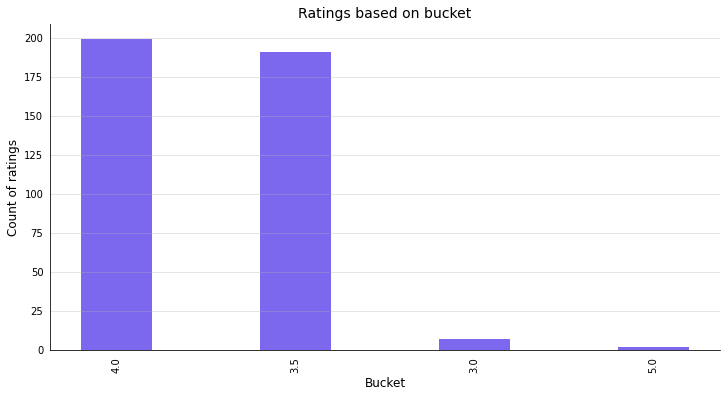

In [10]:
assessment.plot_rating_bucket('average_rating')